In [59]:
import matplotlib.pyplot as plt
def imageShow(image):
    plt.imshow(image, cmap='gray')
    plt.title("Cleaned Image")
    plt.axis('off')
    plt.show()


In [33]:
import easyocr
import re
import cv2

# Load image
image_path = 'nric_sample.jpg'



# Convert to grayscale
gray = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)

# Apply light bilateral filter (preserves edges while removing noise)
filtered = cv2.bilateralFilter(gray, 11, 17, 17)

# Adaptive Thresholding instead of global
thresh = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)


# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Read text from image
results = reader.readtext(thresh, detail=0)

# Join results for easier parsing
text = " ".join(results)

# Extract info using regex or keyword-based parsing
data = {}

# Extract NRIC Number (Format: S1234567A)
nric_match = re.search(r'[STFG]\d{7}[A-Z]', text)
data['NRIC Number'] = nric_match.group() if nric_match else None

# Name extraction (assume it's the line before NRIC or after "Name")
# You can customize based on NRIC format or layout
name_match = re.search(r'Name\s*[:\-]?\s*([A-Z\s]+)', text)
data['Name'] = name_match.group(1).strip() if name_match else None

# Extract DOB (e.g., 01-01-1990 or 01/01/1990)
dob_match = re.search(r'(\d{2}[/-]\d{2}[/-]\d{4})', text)
data['Date of Birth'] = dob_match.group() if dob_match else None

# Extract gender
gender_match = re.search(r'\b(Male|Female|M|F)\b', text, re.IGNORECASE)
data['Gender'] = gender_match.group().capitalize() if gender_match else None

# Address extraction: optional — can be after "Address:"
address_match = re.search(r'Address\s*[:\-]?\s*(.+)', text)
data['Address'] = address_match.group(1).strip() if address_match else None

# Print structured output
print("Structured NRIC Data:")
for key, value in data.items():
    print(f"{key}: {value}")


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [9]:
results

['REPUBLIC OF SINGAPORE',
 'IDENTiTY CARD No.',
 '51234567D',
 'Name',
 'LIM Kok',
 'WINGO',
 'SPECIMEN (`',
 'BkEfyin',
 'ote',
 'CHINESE',
 'Dale al elath',
 'Se4',
 'Ini',
 '19-09-1990',
 '512346670',
 'Counu; Of dittn',
 'SiNgaporE',
 'Puip']

In [69]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load the image
# Load image
image_path = 'test.jpg'
image = cv2.imread(image_path)


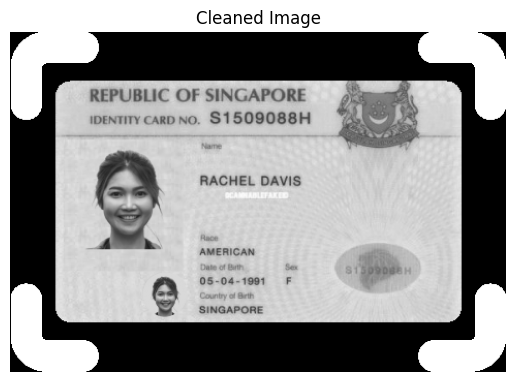

In [70]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageShow(gray)

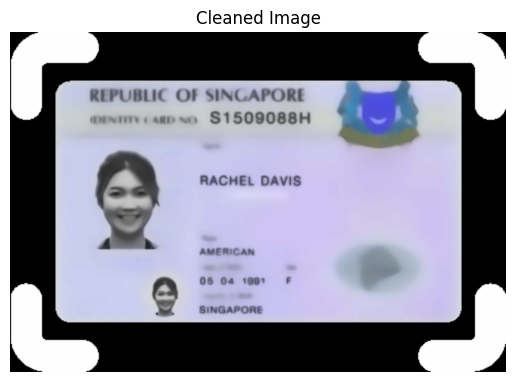

In [63]:
# Resize slightly (optional: only if image is small)
image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
imageShow(image)


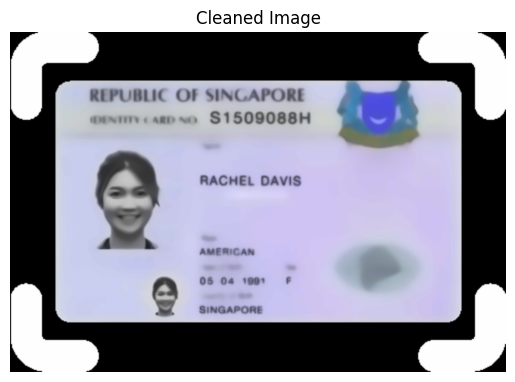

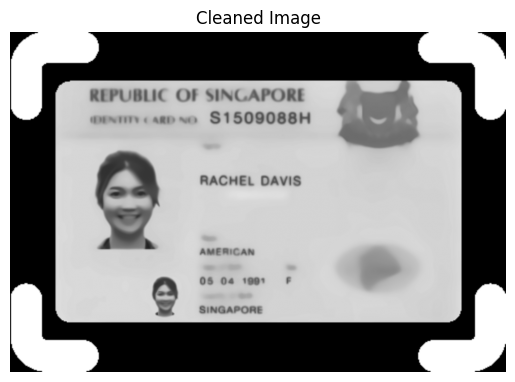

In [64]:

image = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)
imageShow(image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageShow(gray)


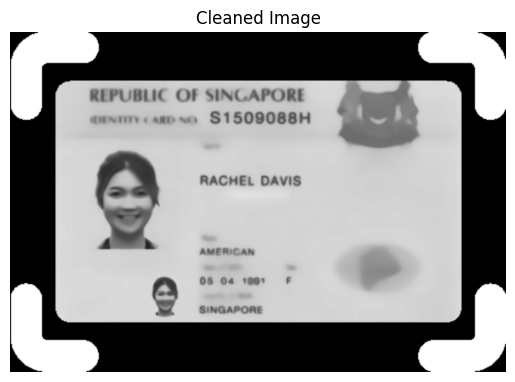

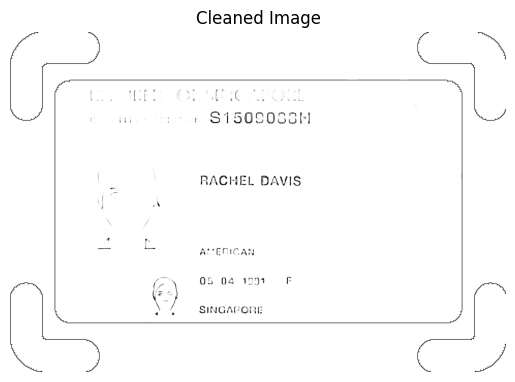

In [ ]:

# Apply light bilateral filter (preserves edges while removing noise)
filtered = cv2.bilateralFilter(gray, 10, 17, 17)
imageShow(filtered)

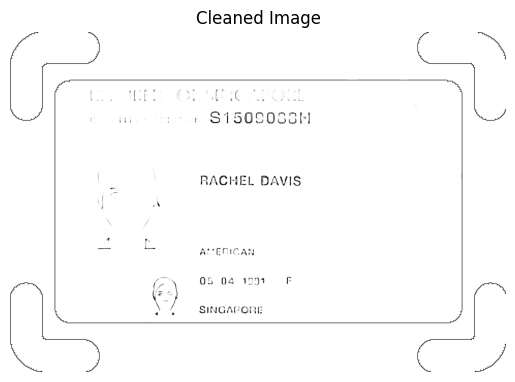

In [68]:
# Adaptive Thresholding instead of global
thresh = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
imageShow(thresh)


In [66]:

# OCR on the processed image
reader = easyocr.Reader(['en'])
results = reader.readtext(thresh, detail=0)

# Output raw results
print("OCR Results:")
for line in results:
    print(line)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


OCR Results:
WL?
Q
',(
818
S150803311
RACI-IEL DAViIS
Ar'ECicAN
05
04
1991
SinGaCOrI:
